In [33]:
# import Numpy and Pandas
import numpy as np
import pandas as pd
# for reading and displaying images, import imread and matplotlib
import matplotlib.pyplot as plt
import imread
import torch
# for creating validation set, import train_test_split; understand how the function works
from sklearn .model_selection import train_test_split
# for evaluating the model, import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# Import necessary PyTorch libraries and modules
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
from torch.utils.data import DataLoader
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import BatchNorm2d
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
 
# Import dataset from pytorch vision - Fashion MNIST
from torchvision.datasets import FashionMNIST



In [34]:
# load dataset and use dataloader to send the data in batches.
transform=Compose([ToTensor(),Normalize([0.5],[0.5])])
train =FashionMNIST(root='FashionMNIST/',train=True, download=True, transform=transform)
test = FashionMNIST(root='FashionMNIST/',train=False, download=True, transform=transform)
train_dl = DataLoader(train, batch_size=32, shuffle=True)
test_dl = DataLoader(test, batch_size=1024, shuffle=False)


# Convert data to tensor and normalise it.

tensor([8, 1, 9, 6, 0, 9, 6, 7, 3, 2, 6, 5, 5, 1, 6, 3, 5, 8, 9, 0, 7, 2, 5, 2,
        3, 3, 1, 1, 8, 6, 7, 0])


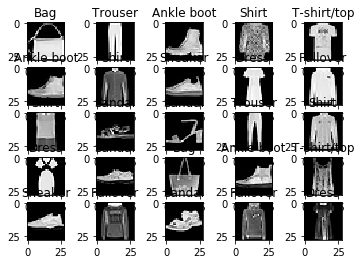

In [35]:
# Visualise some random images from the datset. Check the shape of tensors to get a better understanding of the dataset.
i, (inputs, targets) = next(enumerate(train_dl))
label={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(targets)
a=targets.numpy()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(label[a[i]])
    plt.imshow(inputs[i][0], cmap='gray')
plt.show()

In [36]:
# Define the network architecture(model) using a class.
class CNN(Module):
    def __init__(self, n_channels):
        super(CNN, self).__init__()
        self.hidden1=Conv2d(n_channels,6,kernel_size=5,padding=2)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.norm1=BatchNorm2d(6)
        self.pool1 = MaxPool2d((2,2), stride=(2,2))
        self.hidden2 = Conv2d(32, 32, kernel_size=5,padding=2)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.norm2=BatchNorm2d(32)
        self.pool2 = MaxPool2d((2,2), stride=(2,2))
        self.hidden3 = Linear(7*7*6*4, 10)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.pool1(X)
        X=X.view(X.size(0),-1)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass

In [37]:
# Define training the model
    # defining the optimizer
    # defining the loss function
    # For each epoch and in each batch:
        # clear the gradients
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights
def train_model(train_dl, model):
    criterion = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(5):
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step() 


In [38]:
     
# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
# Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
# calculate accuracy of model
# Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
# and explain your observations in a text file in the Github repository.


  
  Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
  and explain your observations in a text file in the Github repository.
  

In [39]:
# check predictions by printing the output image for random test inputs.

        

In [40]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = np.argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [41]:
model = CNN(1)
train_model(train_dl, model)

In [42]:
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

Accuracy: 0.872


[9 2 1 ... 2 3 8]


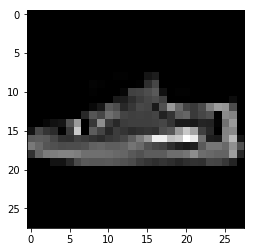

actual:  Sandal
predicted:  Sneaker


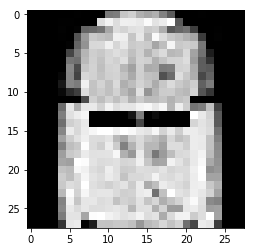

actual:  Coat
predicted:  Coat


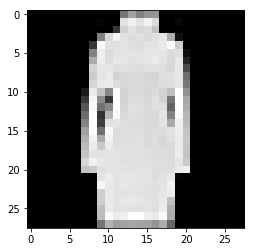

actual:  Coat
predicted:  Coat


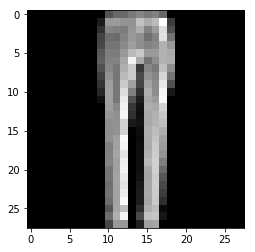

actual:  Trouser
predicted:  Trouser


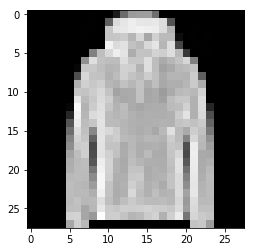

actual:  Coat
predicted:  Coat


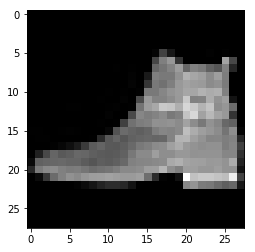

actual:  Ankle boot
predicted:  Ankle boot


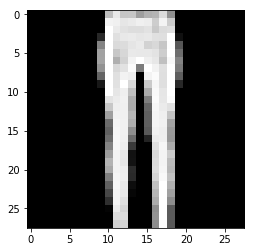

actual:  Trouser
predicted:  Trouser


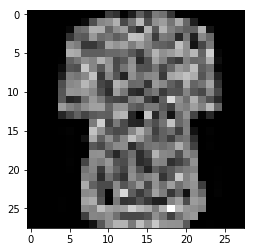

actual:  T-shirt/top
predicted:  Shirt


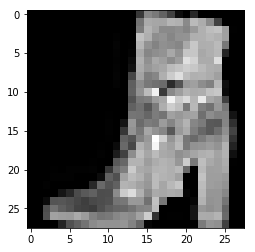

actual:  Ankle boot
predicted:  Ankle boot


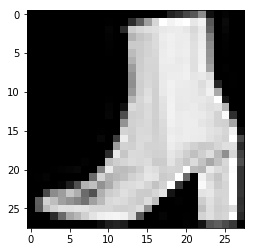

actual:  Ankle boot
predicted:  Ankle boot


In [43]:
i, (inputs, targets) = next(enumerate(test_dl))
yhat=model(inputs)
yhat=yhat.detach().numpy()
yhat = np.argmax(yhat, axis=1)
targets=targets.numpy()
print(yhat)
c=np.random.randint(1,1000,size=10)
label={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
for i in range(10):
    plt.imshow(inputs[c[i]][0],cmap="gray")
    plt.show()
    print("actual: ",label[yhat[c[i]]])
    print("predicted: ",label[targets[c[i]]])
